In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [2]:
df=pd.read_csv('breast-cancer.csv')
df.shape

(569, 32)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.isnull().any()  

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [5]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

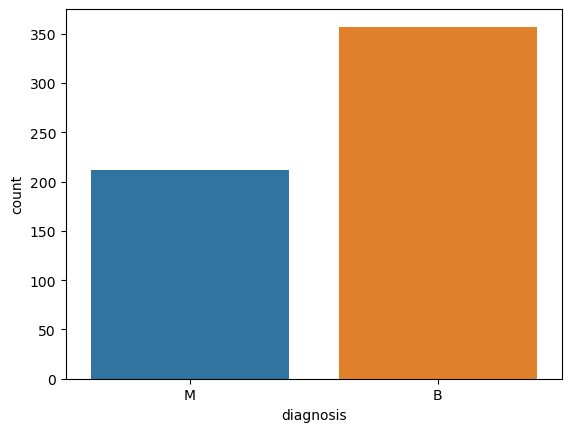

In [6]:
sns.countplot(x="diagnosis", data=df)

In [7]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'compactness_mean'}>,
        <AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>,
        <AxesSubplot:title={'center':'radius_se'}>],
       [<AxesSubplot:title={'center':'texture_se'}>,
        <AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>,
        <AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_se'}>],

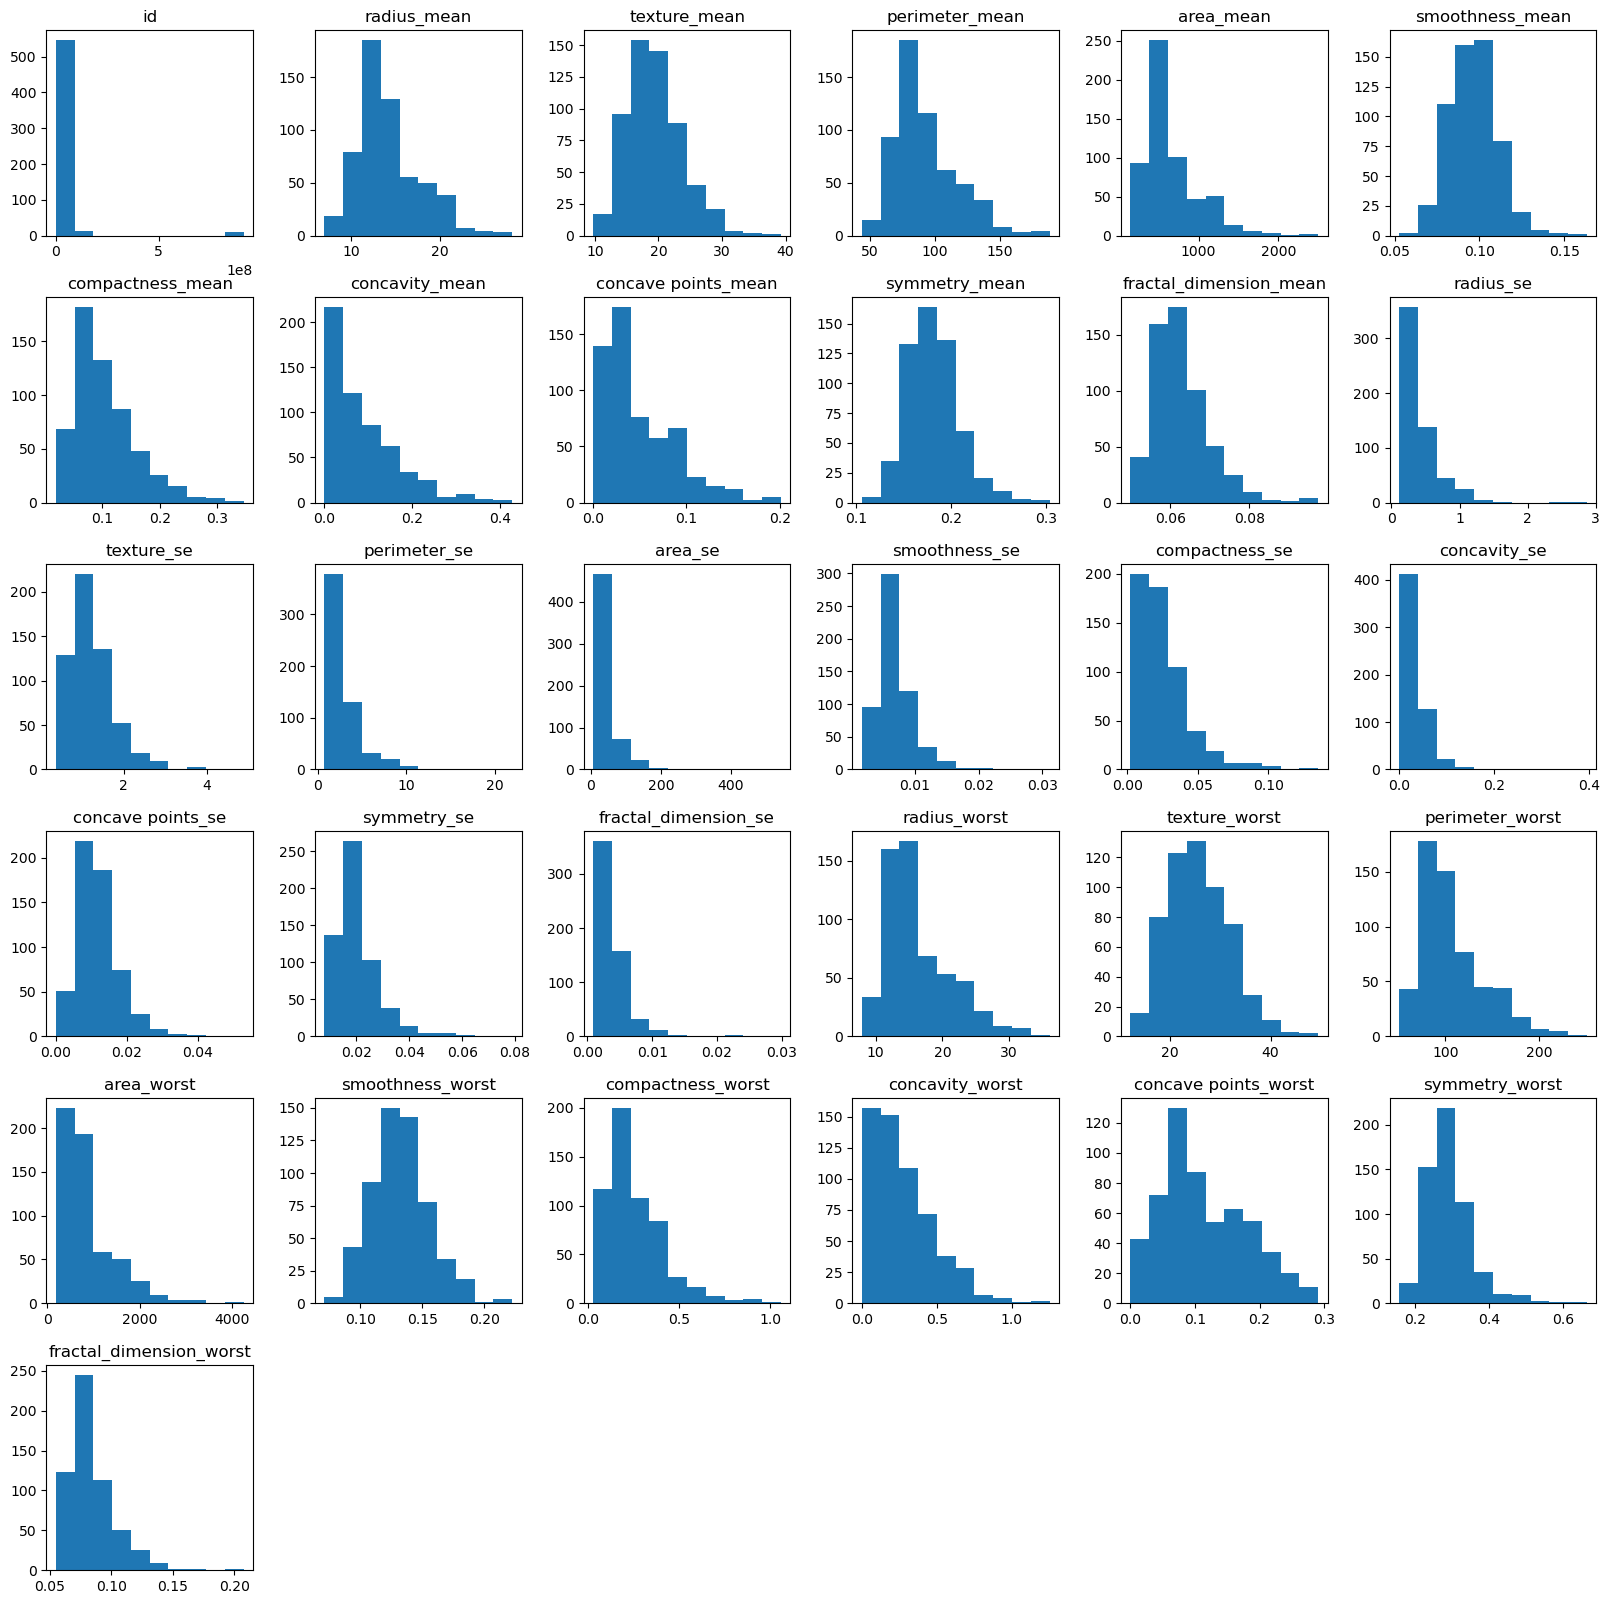

In [8]:
df.hist(bins=10,figsize=(20,20),grid=False)

In [9]:
df.corr()

id  radius_mean  texture_mean  perimeter_mean  \
id                       1.000000     0.074626      0.099770        0.073159   
radius_mean              0.074626     1.000000      0.323782        0.997855   
texture_mean             0.099770     0.323782      1.000000        0.329533   
perimeter_mean           0.073159     0.997855      0.329533        1.000000   
area_mean                0.096893     0.987357      0.321086        0.986507   
smoothness_mean         -0.012968     0.170581     -0.023389        0.207278   
compactness_mean         0.000096     0.506124      0.236702        0.556936   
concavity_mean           0.050080     0.676764      0.302418        0.716136   
concave points_mean      0.044158     0.822529      0.293464        0.850977   
symmetry_mean           -0.022114     0.147741      0.071401        0.183027   
fractal_dimension_mean  -0.052511    -0.311631     -0.076437       -0.261477   
radius_se                0.143048     0.679090      0.275869        0.691765   
texture_se              -0.007526    -0.097317      0.386358       -0.086761   
perimeter_se             0.137331     0.674172      0.281673        0.693135   
area_se                  0.177742     0.735864      0.259845        0.744983   
smoothness_se            0.096781    -0.222600      0.006614       -0.202694   
compactness_se           0.033961     0.206000      0.191975        0.250744   
concavity_se             0.055239     0.194204      0.143293        0.228082   
concave points_se        0.078768     0.376169      0.163851        0.407217   
symmetry_se             -0.017306    -0.104321      0.009127       -0.081629   
fractal_dimension_se     0.025725    -0.042641      0.054458       -0.005523   
radius_worst             0.082405     0.969539      0.352573        0.969476   
texture_worst            0.064720     0.297008      0.912045        0.303038   
perimeter_worst          0.079986     0.965137      0.358040        0.970387   
area_worst               0.107187     0.941082      0.343546        0.941550   
smoothness_worst         0.010338     0.119616      0.077503        0.150549   
compactness_worst       -0.002968     0.413463      0.277830        0.455774   
concavity_worst          0.023203     0.526911      0.301025        0.563879   
concave points_worst     0.035174     0.744214      0.295316        0.771241   
symmetry_worst          -0.044224     0.163953      0.105008        0.189115   
fractal_dimension_worst -0.029866     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
id                        0.096893        -0.012968          0.000096   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave points_se         0.372320         0.380676          0.642262   
symmetry_s

<AxesSubplot:>

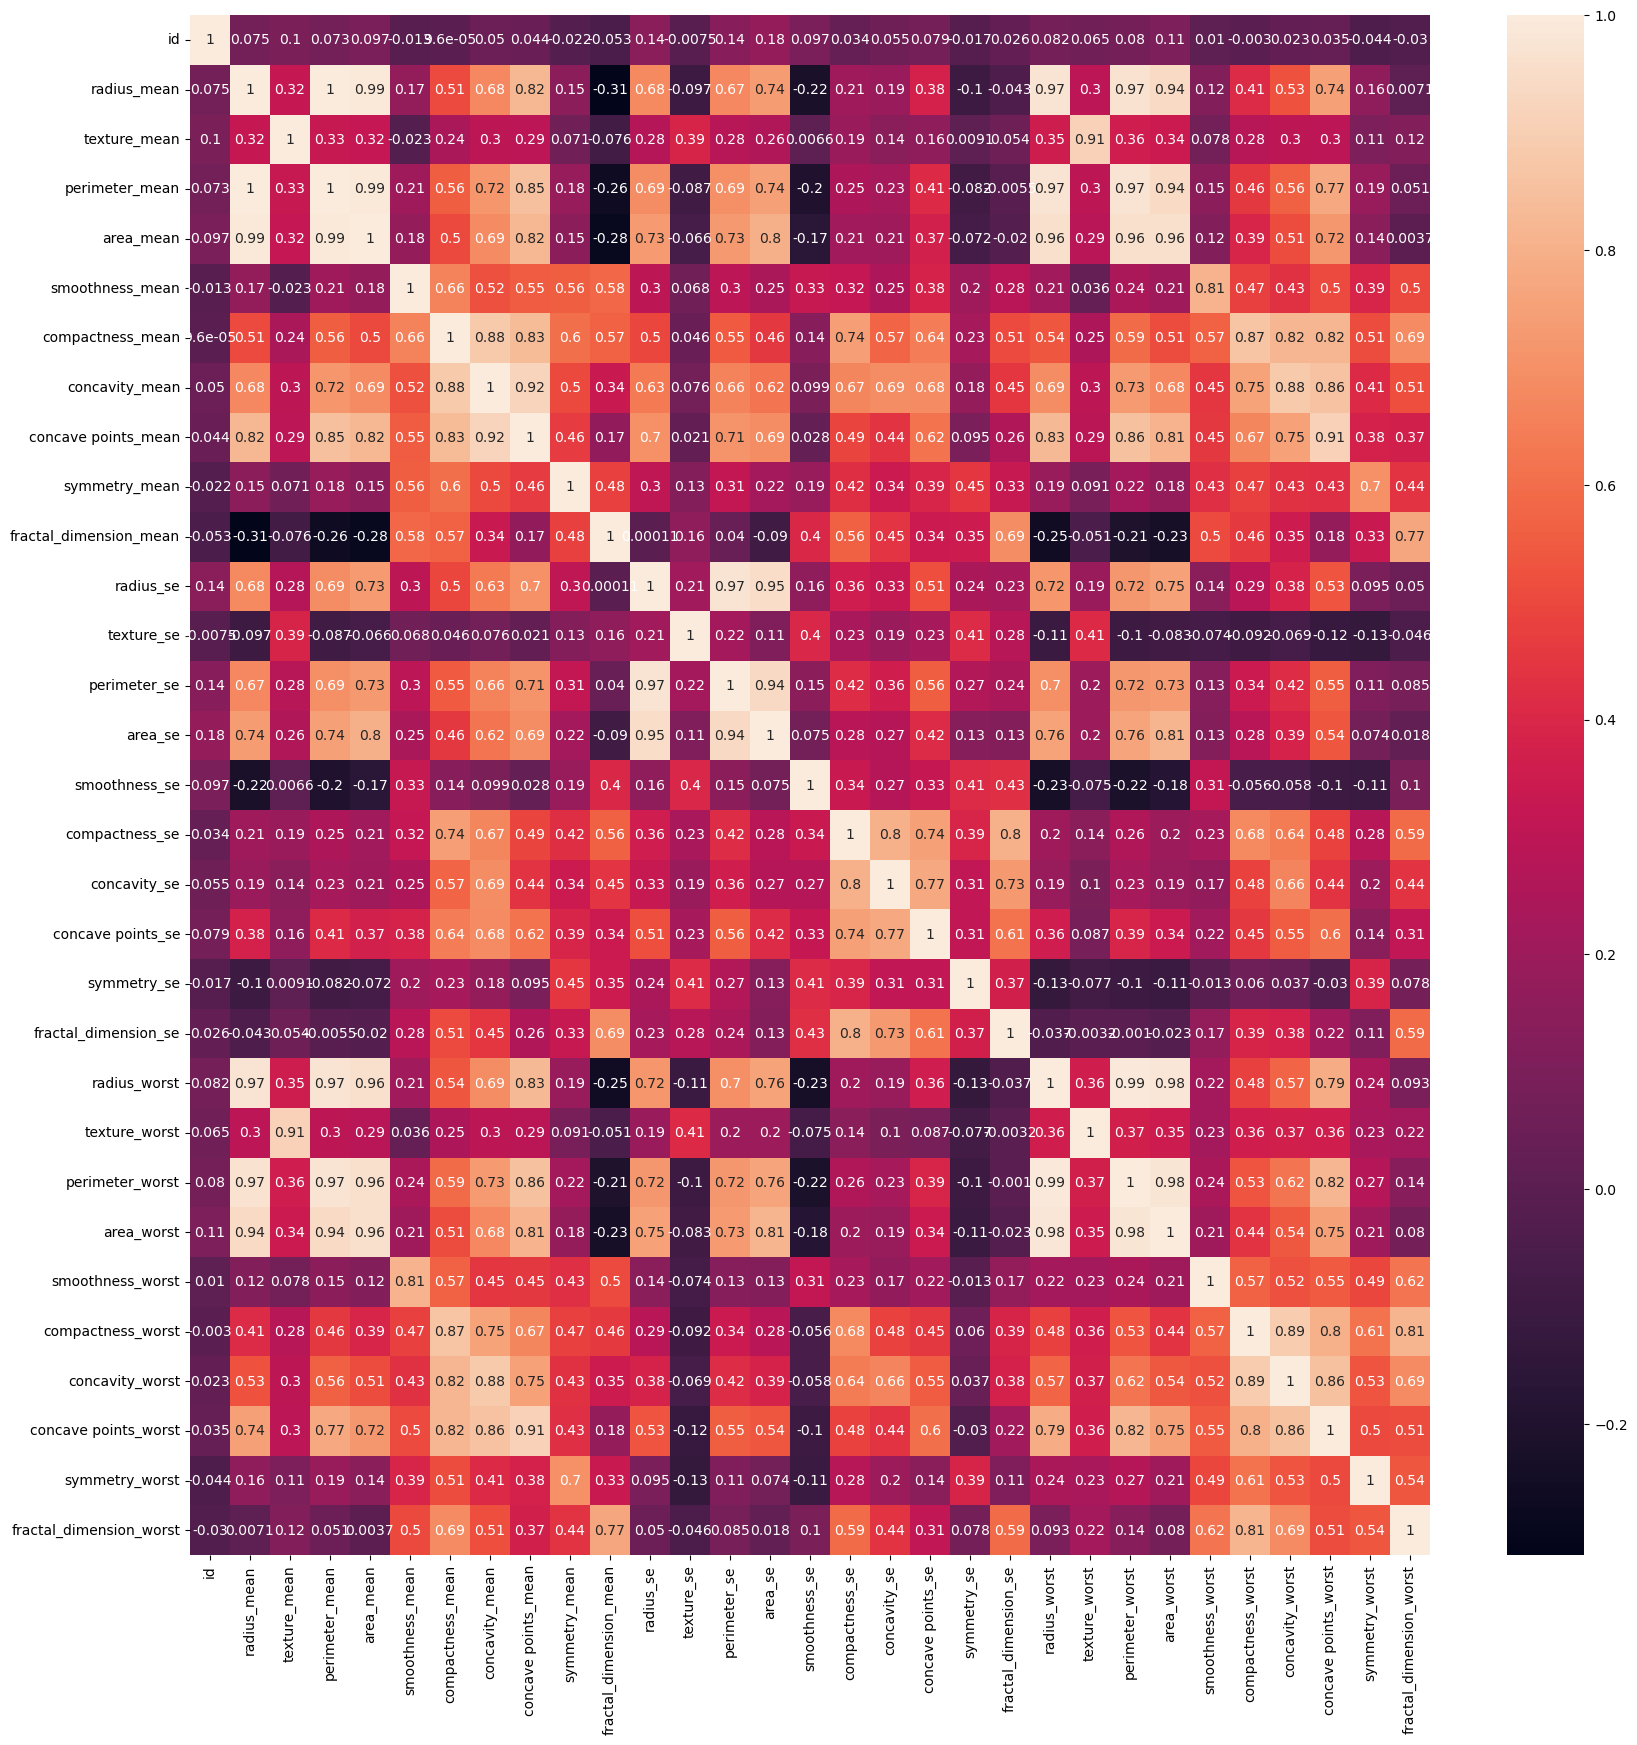

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

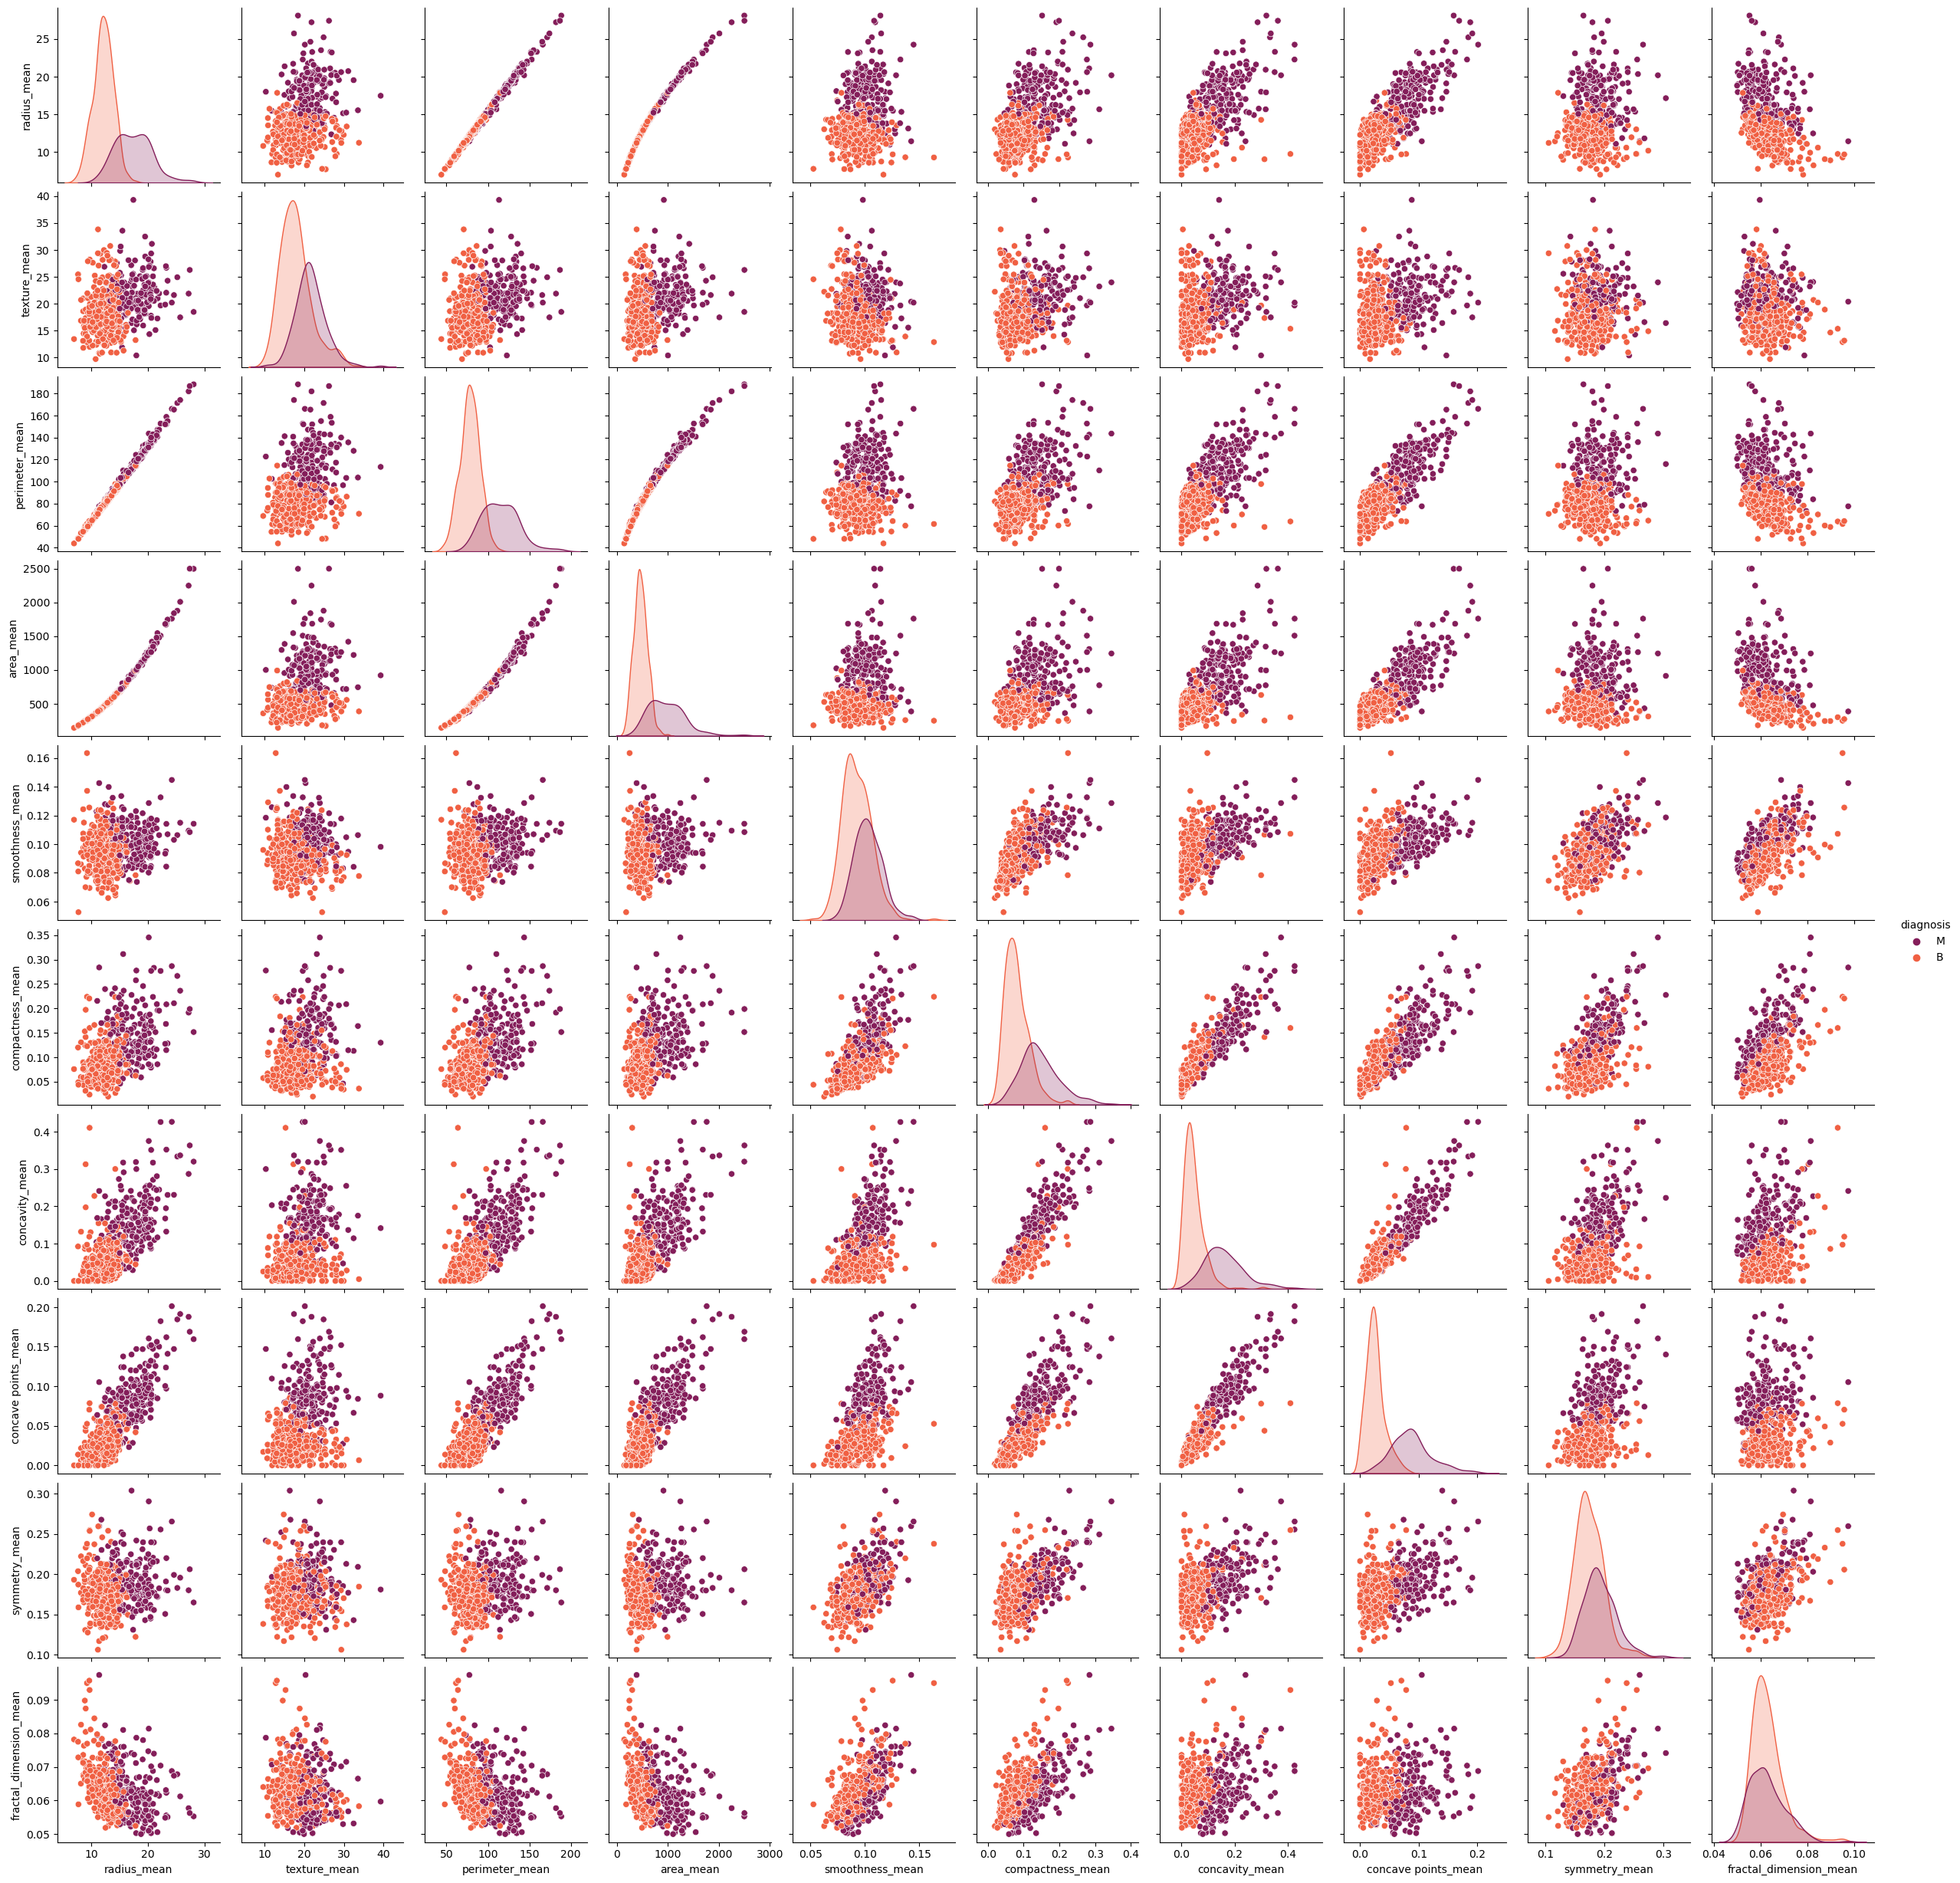

In [11]:
#plot for all the mean values
cols=['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']
sns.pairplot(data=df[cols],hue='diagnosis',palette='rocket')

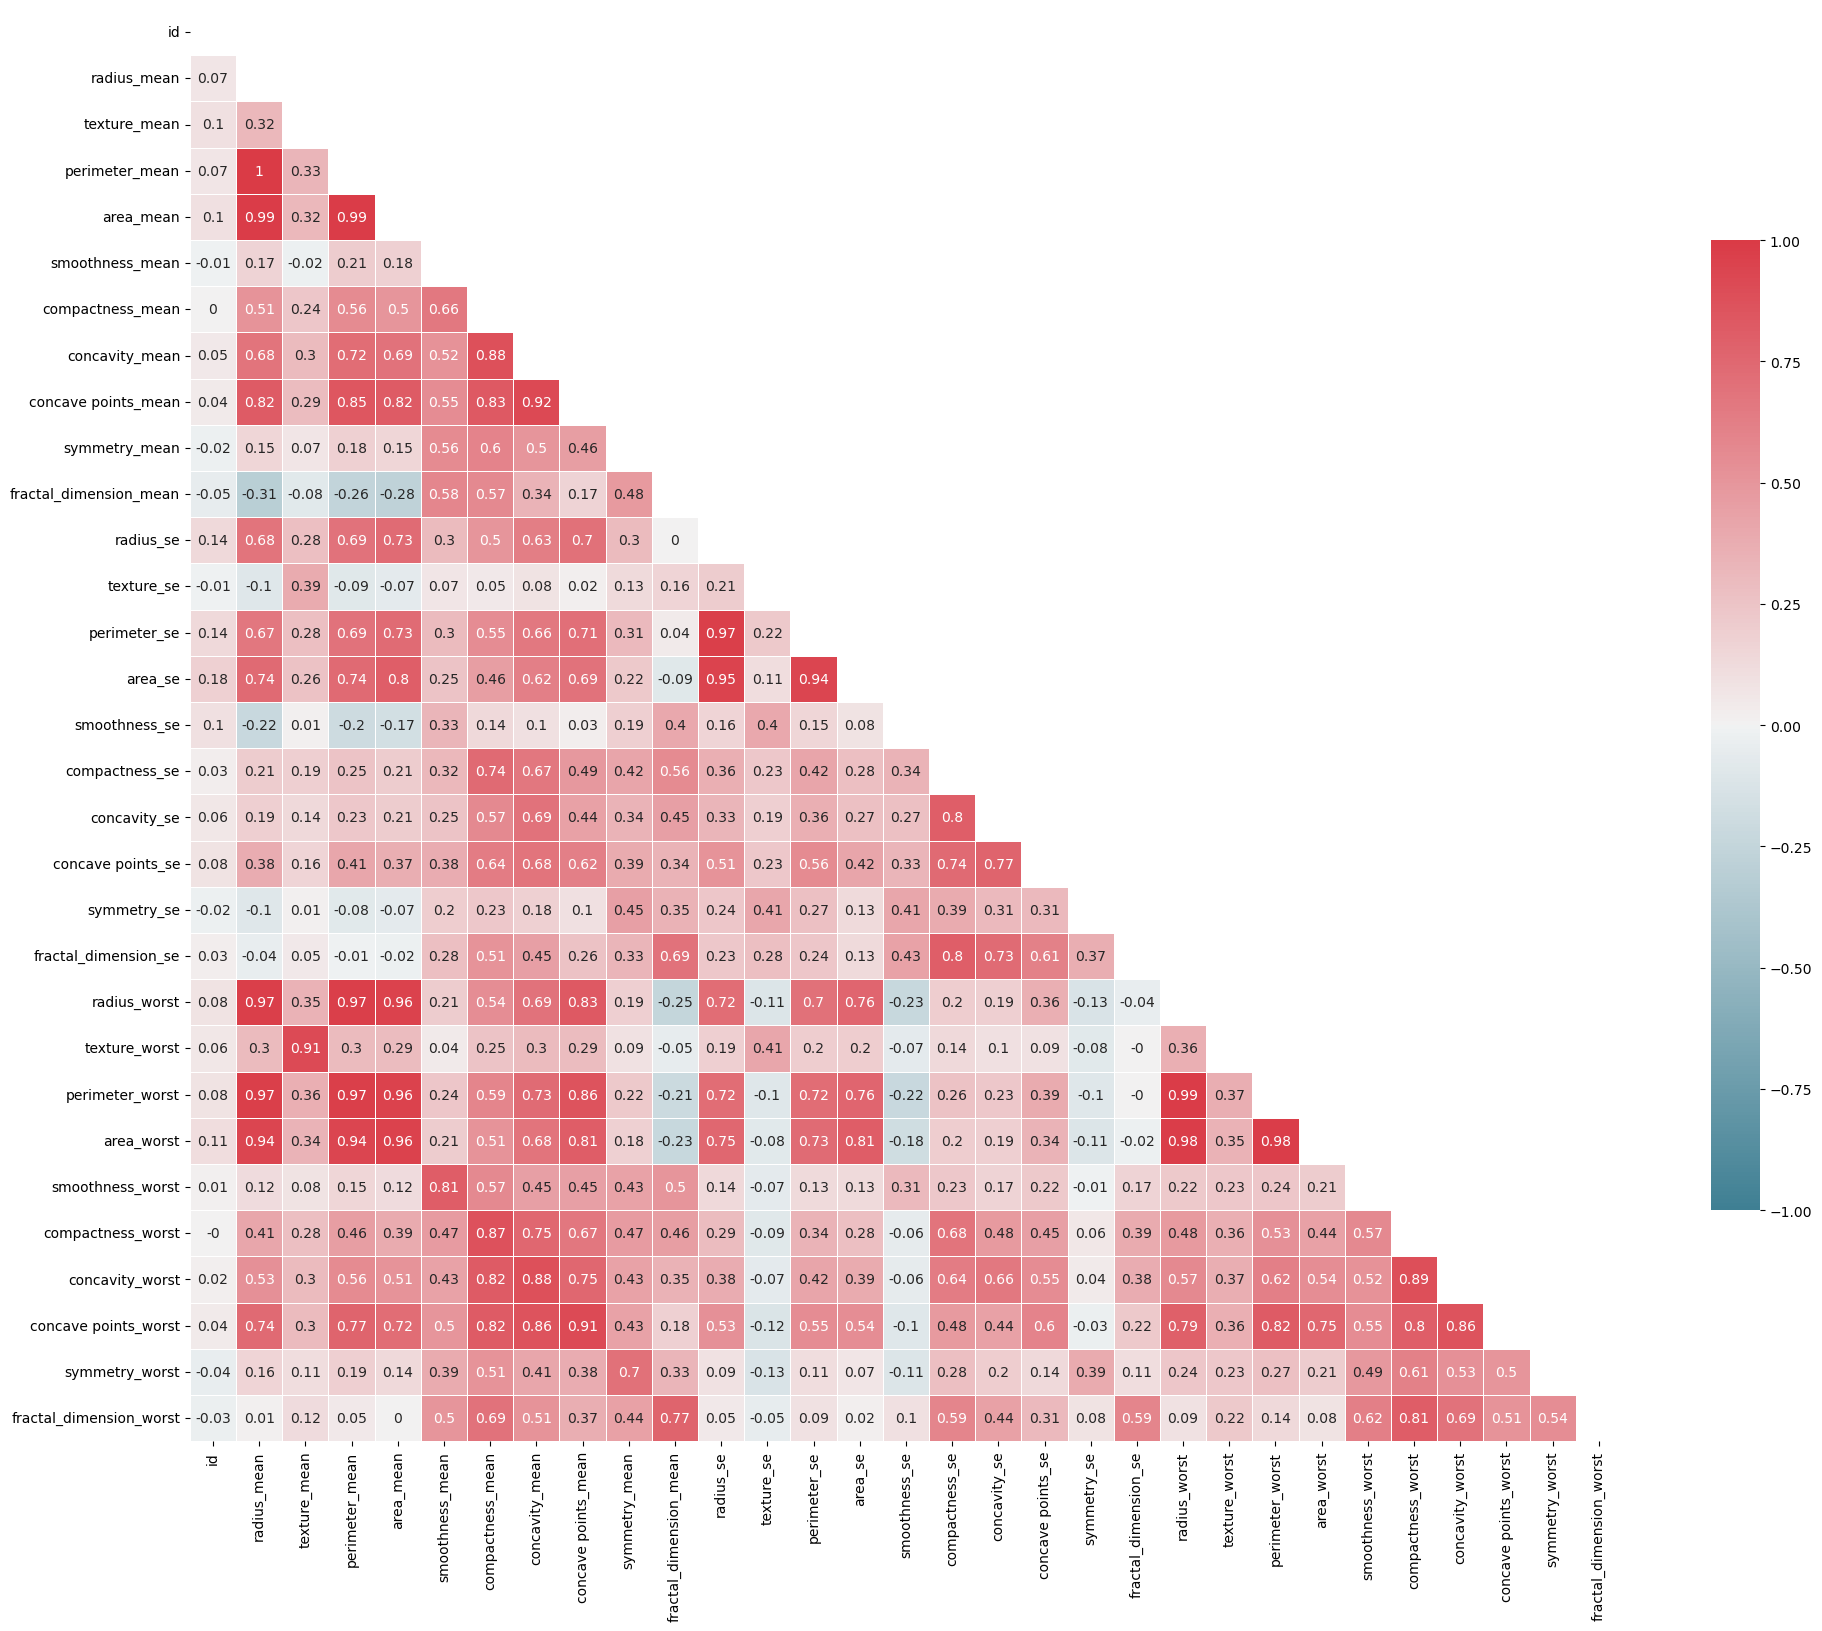

In [12]:
#there is perfect linear relaionship between area perimeter and radius attributes
#so anyone feature can be considered among this
#now generating and visualizing the correlation matrix
corr=df.corr().round(2)
mask=np.zeros_like(corr,dtype=np.bool_)
mask[np.triu_indices_from(mask)]=True
f,ax=plt.subplots(figsize=(20,20))
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmin=-1,vmax=1,center=0,square=True,linewidths=.5,cbar_kws={"shrink":.5},annot=True)
plt.tight_layout()

In [13]:
cols=['radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst' ,'fractal_dimension_worst']
df.drop(cols,axis=1,inplace=True)

In [14]:
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_se  texture_se  perimeter_se  area_se  smoothness_se  \
0    ...     1.0950      0.9053         8.589   153.40       0.006399   
1    ...     0.5435      0.7339         3.398    74.08       0.005225   
2    ...     0.7456      0.7869         4.585    94.03       0.006150   
3    ...     0.4956      1.1560         3.445    27.23       0.009110   
4    ...     0.7572      0.7813         5.438    94.44       0.011490   
..   ...        ...         ...           ...      ...            ...   
564  ...     1.1760      1.2560         7.673   158.70       0.010300   
565  ...     0.7655      2.4630         5.203    99.04       0.005769   
566  ...     0.4564      1.0750         3.425    48.55       0.005903   
567  ...     0.7260      1.5950         5.772    86.22       0.006522   
568  ...     0.3857      1.4280         2.548    19.15       0.007189   

     compactness_se  concavity_se  concave points_se  symmetry_se  \
0           0.04904       0.05373            0.01587      0.03003   
1           0.01308       0.01860            0.01340      0.01389   
2           0.04006       0.03832            0.02058      0.02250   
3           0.07458       0.05661            0.01867      0.05963   
4           0.02461       0.05688            0.01885      0.01756   
..              ...           ...                ...          ...   
564         0.02891       0.05198            0.02454      0.01114   
565         0.02423       0.03950            0.01678      0.01898   
566         0.03731       0.04730            0.01557      0.01318   
567         0.06158       0.07117            0.01664      0.02324   
568         0.00466       0.00000            0.00000      0.02676   

     fractal_dimension_se  
0                0.006193  
1                0.003532  
2                0.004571  
3                0.009208  
4                0.005115  
..                    ...  
564              0.004239  
565              0.002498  
566              0.003892  
567              0.006185  
568              0.002783  

[569 rows x 22 columns]

In [15]:
cols=['perimeter_mean','perimeter_se','area_mean','area_se']
df.drop(cols,axis=1,inplace=True)


In [16]:
#multicollinearity btw compactness, concavity,concave points....compactness is chosen
cols=['concavity_mean','concave points_mean','concavity_se','concave points_se']
df.drop(cols,axis=1,inplace=True)

In [17]:
df

id diagnosis  radius_mean  texture_mean  smoothness_mean  \
0      842302         M        17.99         10.38          0.11840   
1      842517         M        20.57         17.77          0.08474   
2    84300903         M        19.69         21.25          0.10960   
3    84348301         M        11.42         20.38          0.14250   
4    84358402         M        20.29         14.34          0.10030   
..        ...       ...          ...           ...              ...   
564    926424         M        21.56         22.39          0.11100   
565    926682         M        20.13         28.25          0.09780   
566    926954         M        16.60         28.08          0.08455   
567    927241         M        20.60         29.33          0.11780   
568     92751         B         7.76         24.54          0.05263   

     compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
0             0.27760         0.2419                 0.07871     1.0950   
1             0.07864         0.1812                 0.05667     0.5435   
2             0.15990         0.2069                 0.05999     0.7456   
3             0.28390         0.2597                 0.09744     0.4956   
4             0.13280         0.1809                 0.05883     0.7572   
..                ...            ...                     ...        ...   
564           0.11590         0.1726                 0.05623     1.1760   
565           0.10340         0.1752                 0.05533     0.7655   
566           0.10230         0.1590                 0.05648     0.4564   
567           0.27700         0.2397                 0.07016     0.7260   
568           0.04362         0.1587                 0.05884     0.3857   

     texture_se  smoothness_se  compactness_se  symmetry_se  \
0        0.9053       0.006399         0.04904      0.03003   
1        0.7339       0.005225         0.01308      0.01389   
2        0.7869       0.006150         0.04006      0.02250   
3        1.1560       0.009110         0.07458      0.05963   
4        0.7813       0.011490         0.02461      0.01756   
..          ...            ...             ...          ...   
564      1.2560       0.010300         0.02891      0.01114   
565      2.4630       0.005769         0.02423      0.01898   
566      1.0750       0.005903         0.03731      0.01318   
567      1.5950       0.006522         0.06158      0.02324   
568      1.4280       0.007189         0.00466      0.02676   

     fractal_dimension_se  
0                0.006193  
1                0.003532  
2                0.004571  
3                0.009208  
4                0.005115  
..                    ...  
564              0.004239  
565              0.002498  
566              0.003892  
567              0.006185  
568              0.002783  

[569 rows x 14 columns]

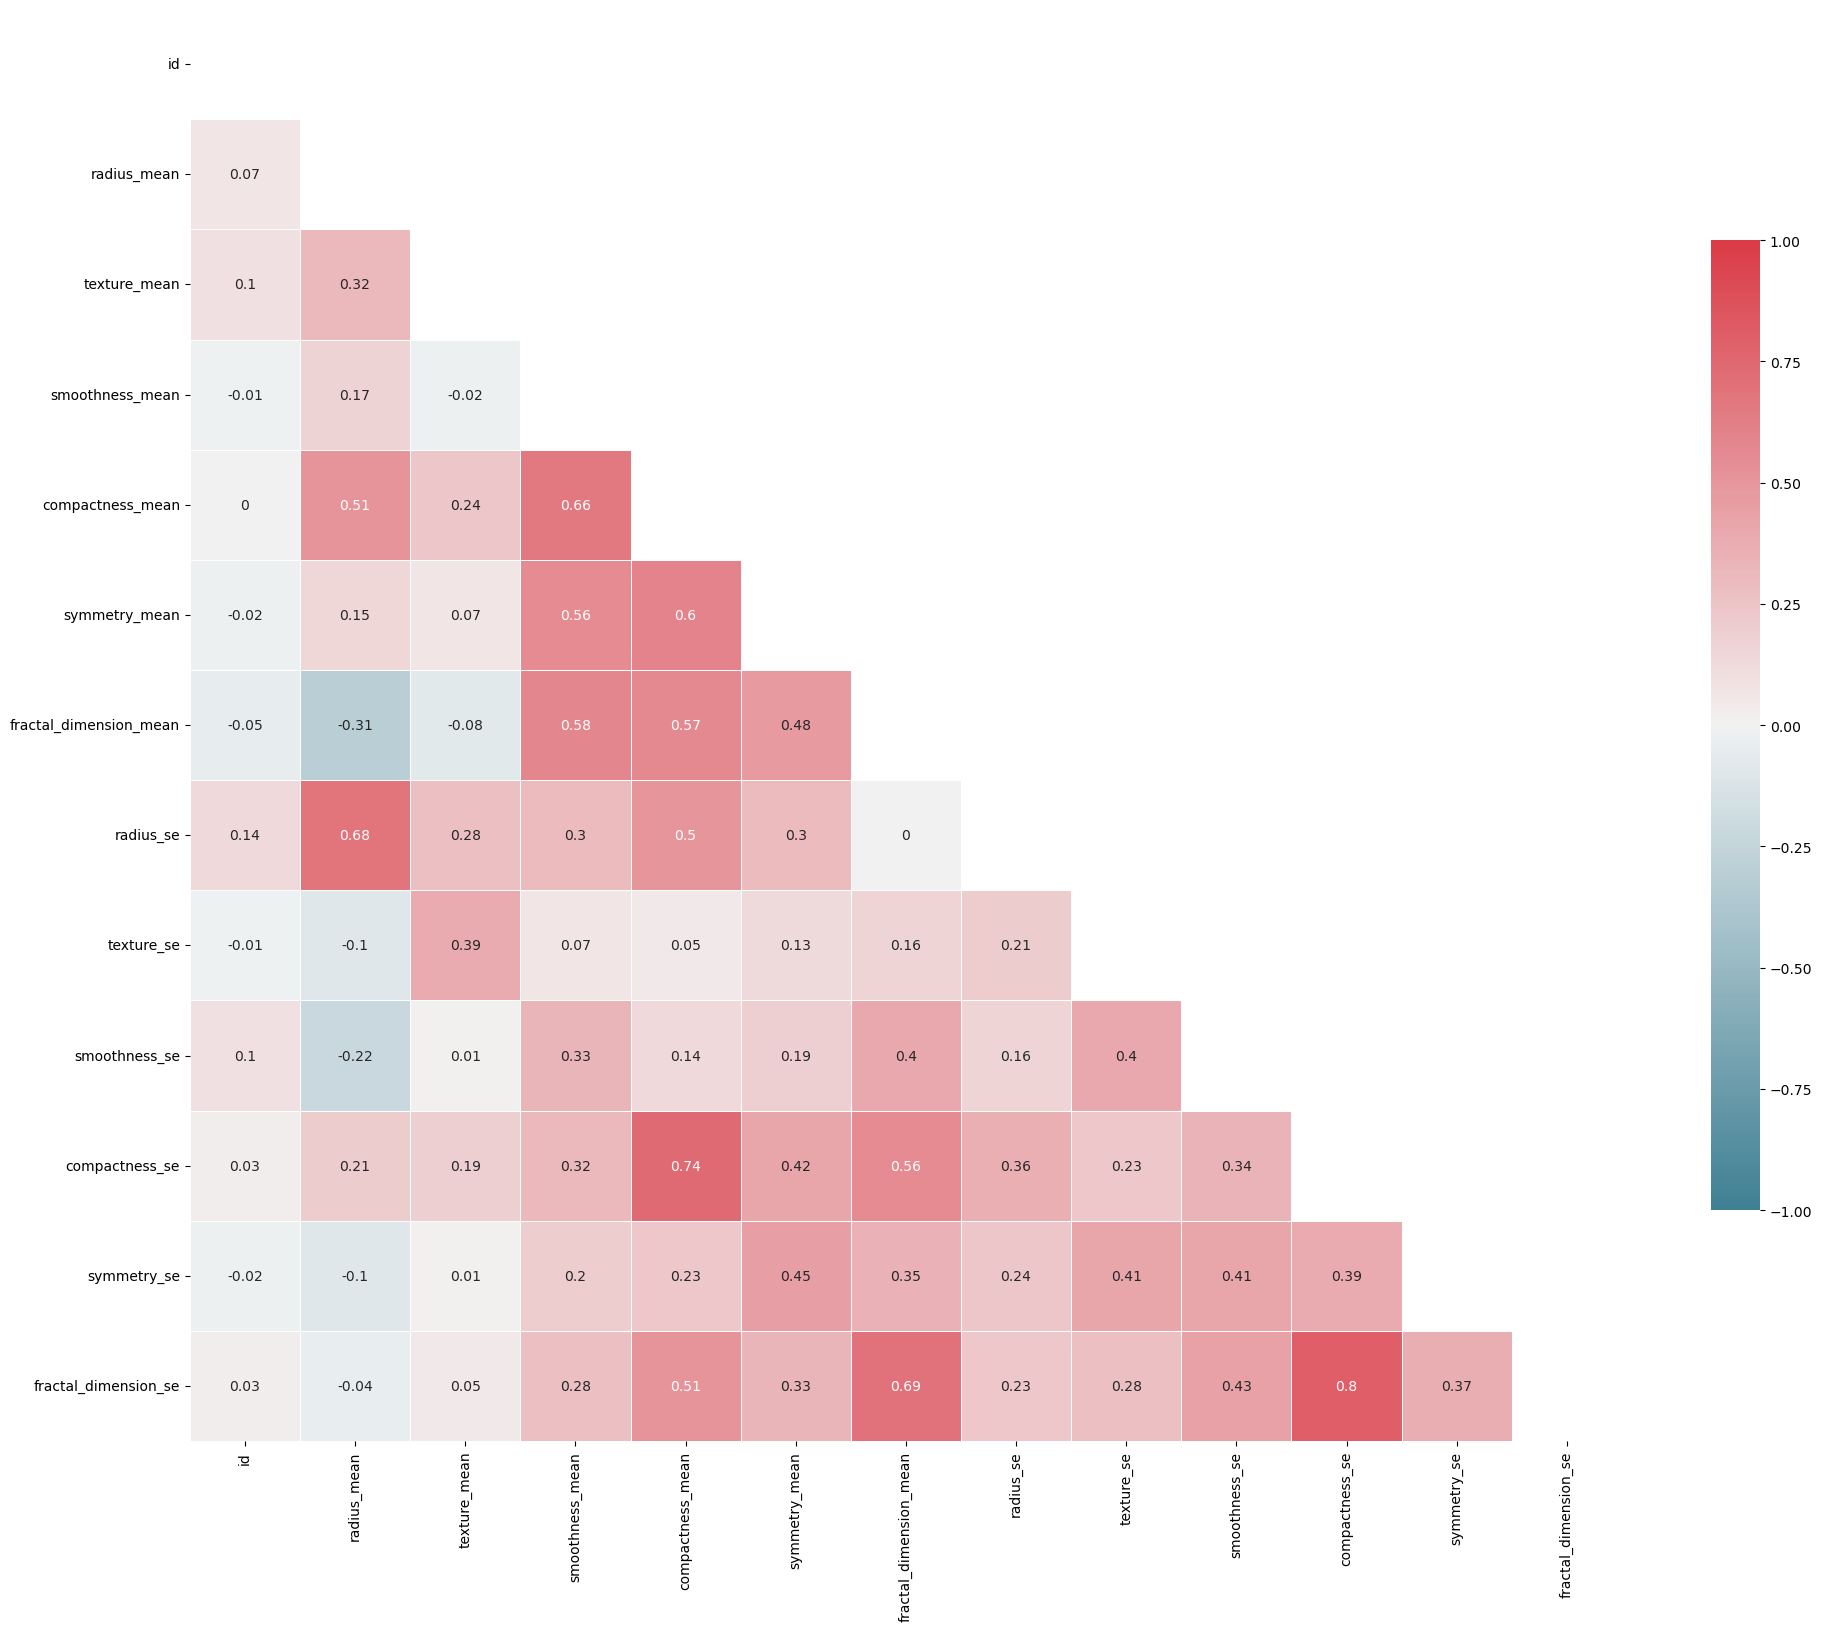

In [18]:
#checking whether there is high correlation
corr=df.corr().round(2)
mask=np.zeros_like(corr,dtype=np.bool_)
mask[np.triu_indices_from(mask)]=True
f,ax=plt.subplots(figsize=(20,20))
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmin=-1,vmax=1,center=0,square=True,linewidths=.5,cbar_kws={"shrink":.5},annot=True)
plt.tight_layout()

In [19]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

In [20]:
x=df.iloc[:,2:].values
y=df.iloc[:,1].values
x,y

(array([[1.799e+01, 1.038e+01, 1.184e-01, ..., 4.904e-02, 3.003e-02,
         6.193e-03],
        [2.057e+01, 1.777e+01, 8.474e-02, ..., 1.308e-02, 1.389e-02,
         3.532e-03],
        [1.969e+01, 2.125e+01, 1.096e-01, ..., 4.006e-02, 2.250e-02,
         4.571e-03],
        ...,
        [1.660e+01, 2.808e+01, 8.455e-02, ..., 3.731e-02, 1.318e-02,
         3.892e-03],
        [2.060e+01, 2.933e+01, 1.178e-01, ..., 6.158e-02, 2.324e-02,
         6.185e-03],
        [7.760e+00, 2.454e+01, 5.263e-02, ..., 4.660e-03, 2.676e-02,
         2.783e-03]]),
 array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
        'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
        'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
        'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
        'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
        'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       

In [30]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=40)
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.fit_transform(xtest)

In [31]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
model1=lr.fit(xtrain,ytrain)
prediction1=model1.predict(xtest)
acc_log = accuracy_score(ytest,prediction1)*100
print('Accuracy of the model: {0}%'.format(acc_log))

Accuracy of the model: 95.90643274853801%


In [32]:
lr.predict([[15.3,10.17,0.14,0.25,0.21,0.0578,15.13,1.01,0.00587,0.0256,0.0189,0.0035]])

array(['M'], dtype=object)

In [34]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(xtrain,ytrain)
svc_predict=svc_model.predict(xtest)
print(svc_predict)

['B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B'
 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M'
 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M'
 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M']


In [40]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,svc_predict)
acc_log = accuracy_score(ytest,svc_predict)*100
print('Accuracy of the model: {0}%'.format(acc_log))
cm

Accuracy of the model: 96.49122807017544%


array([[112,   3],
       [  3,  53]], dtype=int64)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(xtrain,ytrain)
knn_predict=knn_model.predict(xtest)

accuracy_score(knn_predict,ytest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9649122807017544

In [44]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,knn_predict)

cm

array([[114,   1],
       [  5,  51]], dtype=int64)